Sentiment Analysis using Naive Bayes
----

In [1]:
import sentiment_utils as sutils

import nltk
import nltk.classify.util
from nltk.metrics.scores import (precision, recall, f_measure, accuracy)
from nltk.classify import NaiveBayesClassifier

from collections import defaultdict, Counter

import matplotlib.pyplot as plt

#import seaborn as sns
import time
from sentiment_utils import create_training_graph, metrics_fun, featurize, create_index, get_prfa

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [2]:
TRAIN_FILE = "Book1.txt"
DEV_FILE = "test.txt"

In [3]:
nltk.download('wordnet')
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/acehunter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
def nb_classifier(train_feats: list, train_tuples: tuple) -> NaiveBayesClassifier:

    train_data_X = []
    for i in range(len(train_feats)):
        feature = train_feats[i]
        label = str(train_tuples[1][i])
        train_data_X.append((feature, label))
    classifier = NaiveBayesClassifier.train(train_data_X)

    return classifier

In [5]:

# binarized featurization
vocab = create_index(train_tups[0])
start = time.time()
X_train_binary = featurize(vocab, train_tups[0], True, False)
X_dev_binary = featurize(vocab, dev_tups[0], True, False)
end = time.time()
print(f"elapsed time for binary featurisation: {end - start}")
print("------")

# non-binarized featurization
start = time.time()
X_train_multi = featurize(vocab, train_tups[0], False, False)
X_dev_multi = featurize(vocab, dev_tups[0], False, False)
end = time.time()
print(f"elapsed time for multinomial featurisation: {end - start}")
print("------")

# set up & train a sentiment classifier using NLTK's NaiveBayesClassifier and
# binary classifier
start = time.time()
nb_classifier_binary = nb_classifier(X_train_binary, train_tups)
end = time.time()
print(f"elapsed time for binary training: {end - start}")
print("------")

# multinomial classifier
start = time.time()
nb_classifier_multi = nb_classifier(X_train_multi, train_tups)
end = time.time()
print(f"elapsed time for multinomial training: {end - start}")
print("------")

# binary prediction
start = time.time()
predicted_label_binary = nb_classifier_binary.classify(X_dev_binary[1])
end = time.time()
print(f"elapsed time for binary classification: {end - start}")
print(f"Binary Review: {' '.join(dev_tups[0][1])}")
print(f"Binary Predicted Label: {predicted_label_binary}")
print("------")


# multinomial prediction
start = time.time()
predicted_label_multi = nb_classifier_multi.classify(X_dev_multi[1])
end = time.time()
print(f"elapsed time for multinomial classification: {end - start}")
print(f"Multinomial Review: {' '.join(dev_tups[0][1])}")
print(f"Multinomial Predicted Label: {predicted_label_multi}")
print("------")

# test to make sure that you can train the classifier and use it to classify a new example

elapsed time for binary featurisation: 46.256540060043335
------
elapsed time for multinomial featurisation: 59.512452840805054
------
elapsed time for binary training: 2410.259020805359
------
elapsed time for multinomial training: 629.107458114624
------
elapsed time for binary classification: 0.07312798500061035
Binary Review: recession hit veronique branquinho she ha to quit her company such a shame
Binary Predicted Label: 0
------
elapsed time for multinomial classification: 0.05207204818725586
Multinomial Review: recession hit veronique branquinho she ha to quit her company such a shame
Multinomial Predicted Label: 0
------


Binary PRFA
Precision: 0.8875
Recall: 0.8722
F1 Score: 0.8797
Accuracy: 0.8750
------
Multi PRFA
Precision: 0.8838
Recall: 0.8622
F1 Score: 0.8729
Accuracy: 0.8683
------


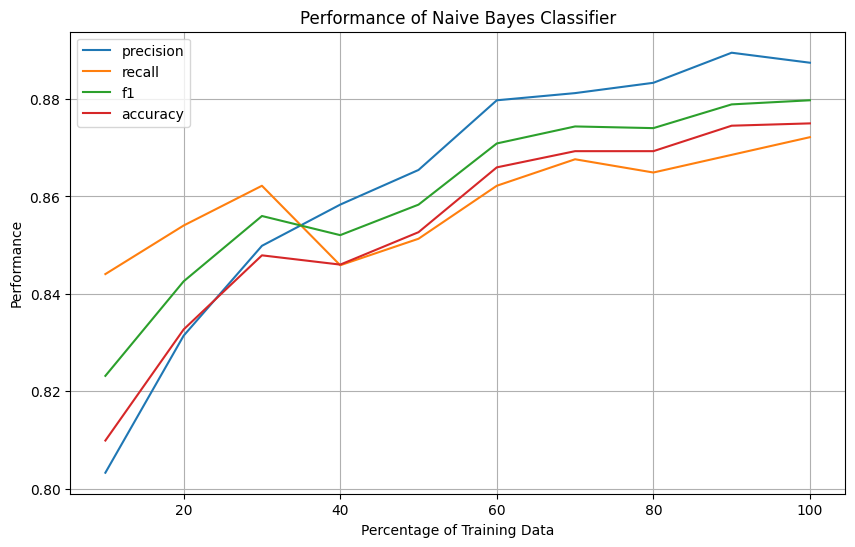

elapsed time for graph: 1921.755038022995


In [7]:
# binary prfc
binary_predictions = []
print(f"Binary PRFA")
for feats in X_dev_binary:
  binary_predictions.append(nb_classifier_binary.classify(feats))
_, _, bin_f1, _ = get_prfa(dev_tups[1], binary_predictions, True)
print("------")

# multinomial prfc
multi_predictions = []
print(f"Multi PRFA")
for feats in X_dev_multi:
  multi_predictions.append(nb_classifier_multi.classify(feats))
_, _, multi_f1, _ = get_prfa(dev_tups[1], multi_predictions, True)
print("------")

if multi_f1 > bin_f1:
    X_train = X_train_multi
    X_dev = X_dev_multi
else:
    X_train = X_train_binary
    X_dev = X_dev_binary

start = time.time()
create_training_graph(X_train, train_tups, X_dev, dev_tups[1], 'Naive Bayes', 'nb')
end = time.time()
elapsed_time = end - start
print(f"elapsed time for graph: {elapsed_time}")


- f1 score binarized: __0.8173__
- f1 score multinomial: __0.7800__